In [342]:
# обработка данных
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# визуализация
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 400)

# проверка гипотез
import scipy.stats as st

# построение модели
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [317]:
# загрузка данных для обработки текста
nltk.download('punkt')
nltk.download('wordnet');

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
vgsales = pd.read_csv('vgsales.csv')

In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [53]:
vgsales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [3]:
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Как критики относятся к спортивным играм?

Обработка данных. Выделение оценок критиков по спортивным и неспортивным играм.

In [10]:
sports_scores = vgsales[vgsales.Genre == 'Sports']['Critic_Score'].dropna().values
other_scores = vgsales[vgsales.Genre != 'Sports']['Critic_Score'].dropna().values

In [50]:
print(f'Кол-во оценок спортивных приложений -', len(sports_scores))
print(f'Кол-во оценок остальных приложений -', len(other_scores))

Кол-во оценок спортивных приложений - 1194
Кол-во оценок остальных приложений - 6943


Визуализация и проверка на нормальность распределения оценок игр.

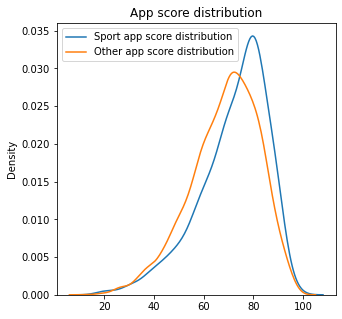

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax = sns.kdeplot(sports_scores), sns.kdeplot(other_scores)
ax[0].set_title('App score distribution', size=12)
ax[0].legend(('Sport app score distribution', 'Other app score distribution'));

In [95]:
# Проверка оценок спортивных игр
stat, p = st.normaltest(sports_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=151.25075517450526, p=1.4332297751857863e-33
Распределение не является нормальным (нулевая гипотеза отвергается)


In [96]:
# Проверка оценок остальных игр
stat, p = st.normaltest(other_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=325.39411075695136, p=2.1956677713312428e-71
Распределение не является нормальным (нулевая гипотеза отвергается)


Распределения сравниваемых оценок не являются нормальными и выборки имеют разный размер. При этом хотелось бы иметь возможность сравнить средние оценки, чтобы понять, отдают ли критики предпочтение спортивным играм, так как на графике прослеживается данная гипотеза. Поэтому применим бутсрап, сформируем выборки с нормальным распределением и используем t-test Стьюдента.

In [108]:
def get_bootstrap_samples(data, n_samples):
    results = []

#   всегда будет 1000 экземпляров в итоговой выборке
    for i in range(0, 1000):
#       выбираем рандомные n_samples чисел из выборки
        indices = np.random.randint(0, len(data), n_samples)
#       из списка берем только те значения, индексы которых совпадают с indices
        samples = data[indices]
#       считаем среднее оценок и сохраняем значение в списке
        result = results.append(samples.mean())
    
    return results

In [121]:
sports_scores_bootstrap = get_bootstrap_samples(sports_scores, 500)
other_scores_bootstrap = get_bootstrap_samples(other_scores, 500)

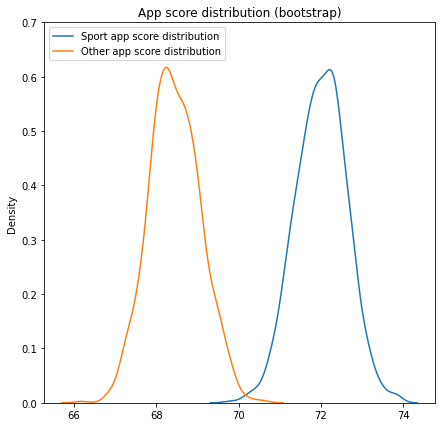

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax = sns.kdeplot(sports_scores_bootstrap), sns.kdeplot(other_scores_bootstrap)
ax[0].set_title('App score distribution (bootstrap)', size=12)
ax[0].set_ylim(0, 0.7)
ax[0].legend(('Sport app score distribution', 'Other app score distribution'), loc = 2);

По графику видно, что распределения стали похожими на нормальные и видно четкое различие между ними. Но на всякий случай проверим нормальность. 

In [131]:
# Проверка оценок спортивных игр
stat, p = st.normaltest(sports_scores_bootstrap)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=1.5154408935786106, p=0.46873371352116333
Распределение похоже на нормальное (нулевая гипотеза не отвергается)


In [132]:
# Проверка оценок остальных игр
stat, p = st.normaltest(other_scores_bootstrap)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=2.071324769162741, p=0.35499116235850675
Распределение похоже на нормальное (нулевая гипотеза не отвергается)


Применим критерий Фишера, чтобы оценить разность дисперсий и применимость t-критерия Стьюдента

In [136]:
np.var(sports_scores_bootstrap, ddof = 1)

0.38601983679279284

In [137]:
np.var(other_scores_bootstrap, ddof = 1)

0.3903371362362365

In [154]:
def f_test(data1, data2):
#   расчет дисперсии выборок
    var_1 = np.var(data1, ddof = 1)
    var_2 = np.var(data2, ddof = 1)
#   расчет статистики F
    F = max([var_1, var_2]) / min([var_1, var_2])
#   определение степеней свободы
    df1 = len(data1) - 1
    df2 = len(data2) - 1
#   определение уровня значимости
    alpha = 0.05
#   расчет p-value
    p_value = st.f.cdf(F, df1, df2)
    
    print(f'alpha = {alpha}, p = {p_value}')

#   Проверка гипотезы о равенстве дисперсий
    if p_value > alpha:
        print('Дисперсии распределений не отличаются (нулевая гипотеза не отвергается)')
    else:
        print('Дисперсии распределений отличаются (нулевая гипотеза отвергается)')

In [155]:
f_test(sports_scores_bootstrap, other_scores_bootstrap)

alpha = 0.05, p = 0.5697441418816921
Дисперсии распределений не отличаются (нулевая гипотеза не отвергается)


Проверка по t-тесту того, что средние оценки спортивных игр выше, чем оценки других игр

In [158]:
#   определение уровня значимости
alpha = 0.05
#   расчет p-value
_, p_value = st.ttest_ind(sports_scores_bootstrap, other_scores_bootstrap, alternative='greater')

print(f'alpha = {alpha}, p = {p_value}')

if p_value > alpha:
    print('Оценки спортивных игр не отличаются от оценок остальных приложений (нулевая гипотеза не отвергается)')
else:
    print('Оценки спортивных игр выше оценок остальных приложений (нулевая гипотеза отвергается)')

alpha = 0.05, p = 0.0
Оценки спортивных игр выше оценок остальных приложений (нулевая гипотеза отвергается)


**Вывод:** В ходе исследования оценок критиков было выявлено значимое предпочтение критиками спортивных игр перед остальными.

### Критикам нравятся больше игры на PC или на PS4?

Обработка данных. Выделение оценок критиков по PC и PS4 играм.

In [160]:
pc_scores = vgsales[vgsales.Platform == 'PC']['Critic_Score'].dropna().values
ps4_scores = vgsales[vgsales.Platform == 'PS4']['Critic_Score'].dropna().values

In [162]:
print(f'Кол-во оценок PC приложений -', len(pc_scores))
print(f'Кол-во оценок PS4 приложений -', len(ps4_scores))

Кол-во оценок PC приложений - 715
Кол-во оценок PS4 приложений - 252


Визуализация и проверка на нормальность распределения оценок игр.

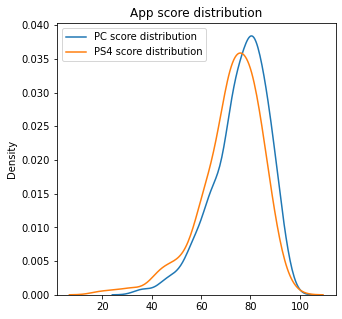

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax = sns.kdeplot(pc_scores), sns.kdeplot(ps4_scores)
ax[0].set_title('App score distribution', size=12)
ax[0].legend(('PC score distribution', 'PS4 score distribution'));

In [164]:
# Проверка оценок PC игр
stat, p = st.normaltest(pc_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=75.0002522189909, p=5.17490236032468e-17
Распределение не является нормальным (нулевая гипотеза отвергается)


In [166]:
# Проверка оценок PS4 игр
stat, p = st.normaltest(ps4_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=54.923660303449196, p=1.1843462850759024e-12
Распределение не является нормальным (нулевая гипотеза отвергается)


Распределения оценок не являются нормальными, кол-во элементов в выборке небольшое. Поэтому применим критерий Манна-Уитни. Так как нужно узнать, нравятся ли критикам PC игры больше, то будет односторонняя альтернатива.

In [167]:
# Проверка оценок PS4 игр
stat, p_value = st.mannwhitneyu(pc_scores, ps4_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p_value > alpha:
    print('Оценки PC игр не отличаются от оценок PS4 игр (нулевая гипотеза не отвергается)')
else:
    print('Оценки PC выше оценок PS4 игр (нулевая гипотеза отвергается)')

Статистика=73273.5, p=1.1843462850759024e-12
Оценки PC выше оценок PS4 игр (нулевая гипотеза отвергается)


**Вывод:** В ходе исследования оценок критиков было выявлено значимое предпочтение критиками PC играми перед PS4 играми.

### Критикам больше нравятся стрелялки или стратегии?

Обработка данных. Выделение оценок критиков по срелялкам и стратегиям.

In [172]:
shooter_scores = vgsales[vgsales.Genre == 'Shooter']['Critic_Score'].dropna().values
strategy_scores = vgsales[vgsales.Genre == 'Strategy']['Critic_Score'].dropna().values

In [173]:
print(f'Кол-во оценок стрелялок -', len(shooter_scores))
print(f'Кол-во оценок стратегий -', len(strategy_scores))

Кол-во оценок стрелялок - 944
Кол-во оценок стратегий - 302


Визуализация и проверка на нормальность распределения оценок игр.

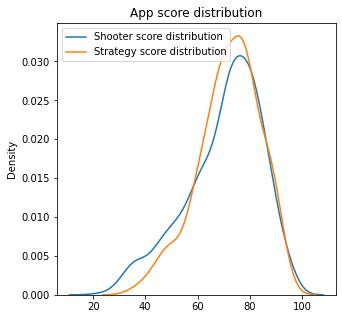

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax = sns.kdeplot(shooter_scores), sns.kdeplot(strategy_scores)
ax[0].set_title('App score distribution', size=12)
ax[0].legend(('Shooter score distribution', 'Strategy score distribution'));

In [175]:
# Проверка оценок стрелялок
stat, p = st.normaltest(shooter_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=66.79847830341916, p=3.1253217666040778e-15
Распределение не является нормальным (нулевая гипотеза отвергается)


In [176]:
# Проверка оценок PS4 игр
stat, p = st.normaltest(strategy_scores)
print(f'Статистика={stat}, p={p}')

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (нулевая гипотеза не отвергается)')
else:
    print('Распределение не является нормальным (нулевая гипотеза отвергается)')

Статистика=14.010932420748738, p=0.0009069110253740046
Распределение не является нормальным (нулевая гипотеза отвергается)


Распределения оценок не являются нормальными, кол-во элементов в выборке небольшое. Поэтому применим критерий Манна-Уитни. Так как нужно узнать, нравятся ли критикам стрелялки больше, то будет односторонняя альтернатива.

In [356]:
# Проверка оценок PS4 игр
stat, p_value = st.mannwhitneyu(shooter_scores, strategy_scores, alternative='greater')
print(f'Статистика={stat}, p={p_value}')

alpha = 0.05
if p_value > alpha:
    print('Оценки стрелялок не отличаются от оценок стратегий (нулевая гипотеза не отвергается)')
else:
    print('Оценки стрелялок выше оценок стратегий (нулевая гипотеза отвергается)')

Статистика=136251.5, p=0.8762677566191199
Оценки стрелялок не отличаются от оценок стратегий (нулевая гипотеза не отвергается)


**Вывод:** В ходе исследования оценок критиков было выявлено, что средние оценки игр стрелялок не выше оценок игр стратегий. 

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  

2) Удалите мусорные символы;  

3) Удалите стоп-слова;  

4) Привидите все слова к нормальной форме;  

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html); 

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

### Загрузка данных

In [278]:
spam_data = pd.read_csv('spam.csv')
spam_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Обработка текста

In [345]:
def process_message(message):
#   приведение к нижнему регистру
    result = message.lower()
#   удаление спец. символов
    result = re.sub('[\W_]+',' ', result)
    return result

In [346]:
spam_data['Message'] = spam_data['Message'].apply(process_message)

In [347]:
spam_data.head()

,Category,Message
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


### Подготовка пайплайна для обработки и классификации текста

In [348]:
def normilize_message(message):
    tokens = word_tokenize(message)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [349]:
text_clf = Pipeline([
     ('tfidf', TfidfVectorizer(tokenizer = normilize_message, stop_words = text.ENGLISH_STOP_WORDS)),
     ('clf', LogisticRegression(random_state = 42))])

### Разделение данных на данные для обучения и теста

In [350]:
X_train, X_test, y_train, y_test = train_test_split(train.Message, train.Category, test_size=0.2, random_state=42)

### Тренировка модели

In [351]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anythin

### Оценка модели

In [352]:
y_pred = text_clf.predict(X_test)
print('Матрица ошибок: \n', confusion_matrix(y_test,y_pred))
print()
print('Точность предсказания: \n', accuracy_score(y_test, y_pred))

Матрица ошибок: 
 [[667   0]
 [ 31  82]]

Точность предсказания: 
 0.9602564102564103


### Выводы по результатам

Построенная модель верно определяет тип письма в 96% случаев. При этом при предсказании результатов случались ошибки FN типа. То есть был предсказан "не спам", когда это был "спам". Обратных ошибок, когда не пропускался "не спам" не было. Как мне кажется ошибки такого рода допустимы. Так как лучше получить несколько "нежелательных" писем, чем обнаружить нужное сообщение в спаме.

### Вывод некорректно распознанных сообщений

In [353]:
pred_data = pd.DataFrame(np.stack([X_test, y_test, y_pred], axis=1), columns=['Message', 'true_category', 'pred_category'])

In [354]:
pred_data[pred_data.true_category != pred_data.pred_category]

,Message,true_category,pred_category
14,tddnewsletter emc1 co uk more games from thedailydraw dear helen dozens of free games with great prizeswith,spam,ham
39,text pass to 69669 to collect your polyphonic ringtones normal gprs charges apply only enjoy your tones,spam,ham
74,25p 4 alfie moon s children in need song on ur mob tell ur m8s txt tone charity to 8007 for nokias or poly charity for polys zed 08701417012 profit 2 charity,spam,ham
90,get your garden ready for summer with a free selection of summer bulbs and seeds worth £33 50 only with the scotsman this saturday to stop go2 notxt co uk,spam,ham
98,claire here am havin borin time am now alone u wanna cum over 2nite chat now 09099725823 hope 2 c u luv claire xx calls£1 minmoremobsemspobox45po139wa,spam,ham
103,congrats 1 year special cinema pass for 2 is yours call 09061209465 now c suprman v matrix3 starwars3 etc all 4 free bx420 ip4 5we 150pm dont miss out,spam,ham
117,asked 3mobile if 0870 chatlines inclu in free mins india cust servs sed yes l8er got mega bill 3 dont giv a shit bailiff due in days i o £250 3 want £800,spam,ham
155,freemsg hi baby wow just got a new cam moby wanna c a hot pic or fancy a chat im w8in 4utxt rply chat to 82242 hlp 08712317606 msg150p 2rcv,spam,ham
233,update now 12mths half price orange line rental 400mins call mobileupd8 on 08000839402 or call2optout j5q,spam,ham
258,good luck draw takes place 28th feb 06 good luck for removal send stop to 87239 customer services 08708034412,spam,ham


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
